#### RandomForest Classifier

In [1]:
##Import Required Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import time

In [2]:
## Importing Iris Data Set
Full_data= load_iris()
#print(Full_data)

## Seperating data and target values from dataset
Main_data = Full_data['data']
#print(len(Main_data))
Class = Full_data['target']

## Converting to dataframes and assigning column names
data_df= pd.DataFrame(Main_data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
class_df=pd.DataFrame(Class, columns=['Class'])

##Replacing Class values with actual category
setosa_df = class_df.replace(to_replace=[0], value='Setosa', regex=True)
versicolor_df = setosa_df.replace(to_replace=[1], value='versicolor', regex=True)
class_name_df = versicolor_df.replace(to_replace=[2], value='virginica', regex=True)
#print(class_name_df)

##Combining data Dataframe with class dataframe 
F1_df = pd.concat([data_df.reset_index(drop=True), class_df.reset_index(drop=True)], axis=1)        #Without class names
print(F1_df)
print('------------------------------------------------------------------------------------------')
F2_df = pd.concat([data_df.reset_index(drop=True), class_name_df.reset_index(drop=True)], axis=1)     #With class names
print(F2_df)

##Using iloc
data_df= F1_df.iloc[:, :-1].values
class_df = F1_df.iloc[:, 4].values

     sepal length  sepal width  petal length  petal width  Class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]
------------------------------------------------------------------------------------------
     sepal length  sepal width  petal length  petal width      Class
0             5.1          3.5      

In [3]:
## Divide the data int0 training and testing Data
full_train_data, full_test_data, full_train_class, full_test_class = train_test_split(data_df, class_df, test_size=0.2, train_size=0.8, random_state=42)

In [4]:
##RandomForest Classifier Implementation

Acc_list=[]                     #Accuracy List
trees=[5, 10, 50, 150, 200]
dep= [3, 5, 10, None]
start = time.time()
for i in range(len(trees)):
    for j in range(len(dep)):
        RF_classifier= RandomForestClassifier(n_estimators=trees[i], max_depth=dep[j], random_state=42)
        values = cross_val_score(RF_classifier, full_train_data, full_train_class, cv=10)
        print('For number of trees = %d' %trees[i])
        print('For Max depth = %s' %dep[j])
        Accuracy = values.mean()*100
        print('Accuracy is: ', Accuracy, '%')
        print('\n')
        end = (time.time() - start)
        print('Time taken: ', end)
        print('---------------------------------------------------------------------------------------------------')
        Acc_list.append(Accuracy)  

print('Accuracy list is:\n', Acc_list)
print('\n\n')
print('Total Accuracies are: ', len(Acc_list))

For number of trees = 5
For Max depth = 3
Accuracy is:  94.16666666666667 %


Time taken:  0.06782150268554688
---------------------------------------------------------------------------------------------------
For number of trees = 5
For Max depth = 5
Accuracy is:  94.16666666666667 %


Time taken:  0.13165068626403809
---------------------------------------------------------------------------------------------------
For number of trees = 5
For Max depth = 10
Accuracy is:  94.16666666666667 %


Time taken:  0.19544577598571777
---------------------------------------------------------------------------------------------------
For number of trees = 5
For Max depth = None
Accuracy is:  94.16666666666667 %


Time taken:  0.26130247116088867
---------------------------------------------------------------------------------------------------
For number of trees = 10
For Max depth = 3
Accuracy is:  94.16666666666667 %


Time taken:  0.3769965171813965
-----------------------------------------

               5         10         50        150        200
Depth                                                       
3.0    94.166667  94.166667  95.000000  94.166667  94.166667
5.0    94.166667  92.500000  93.333333  92.500000  93.333333
10.0   94.166667  91.666667  93.333333  92.500000  93.333333
NaN    94.166667  91.666667  93.333333  92.500000  93.333333


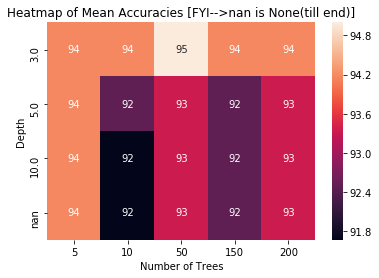

In [5]:
#Slicing the complete list of accuracies to seperate according to 'number to trees'
T5_list = Acc_list[0:4]         #Includes all the accuracies of 5 trees with different depths
T10_list = Acc_list[4:8]        #Includes all the accuracies of 10 trees with different depths
T50_list = Acc_list[8:12]       #Includes all the accuracies of 50 trees with different depths
T150_list = Acc_list[12:16]     #Includes all the accuracies of 150 trees with different depths
T200_list = Acc_list[16:20]     #Includes all the accuracies of 200 trees with different depths

##List to DataFrame Conversion for Heatmap
T5_df = pd.DataFrame(T5_list, columns=['5'])
T10_df = pd.DataFrame(T10_list, columns=['10'])
T50_df = pd.DataFrame(T50_list, columns=['50'])
T150_df = pd.DataFrame(T150_list, columns=['150'])
T200_df = pd.DataFrame(T200_list, columns=['200'])
index_df = pd.DataFrame(dep, columns=['Depth'])

## Combining all the sliced dataframes
Combined_df = pd.concat([index_df.reset_index(drop=True), T5_df.reset_index(drop=True),T10_df.reset_index(drop=True), T50_df.reset_index(drop=True), T150_df.reset_index(drop=True), T200_df.reset_index(drop=True)], axis=1)
Combined_df = Combined_df.set_index('Depth')
print(Combined_df)

#Plotting Heatmap
sns.heatmap(Combined_df, annot=True)
plt.xlabel('Number of Trees')
plt.title('Heatmap of Mean Accuracies [FYI-->nan is None(till end)]')
plt.show()

#### ANALYSIS:

##### Highest Accuracy of 95% is obtained for Number of Trees =50 and Max_Depth = 3.

##### In Random Forest Classifier:
- As the number of tree increases it helps the model to learn the data in a better manner as noise effect gets reduced with the aggregation of trees. On the other hand, having too many trees slows down the model performance.


- The deeper you allow your tree to grow, it will have more splits which eventually captures more information about the data. This might lead to overfitting as model will perfectly fit over the training data and will not be able to generalize itself over the test data.


- We obtained highest accuracy at **minimum depth** =3 and with **number of trees =50** the classifier took 2.2689 seconds. Here classifier is in a balanced bias and Variance state and takes both Petal length and Petal Width into account for classification.


- After 50 trees i.e trees= [150,200], bias starts to increase more and classifier starts to lose its generalization capacity because of more random samples. Additionally, Time taken by classifier to perform classification also increases drastically.